In [1]:
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import pandas as pd
import numpy as np
from scipy import optimize
import os
import json
from matplotlib import pyplot as plt
import matplotlib

from collections import defaultdict

In [2]:
param_names = [
                 'num_trains',
                 'qf_lr',

               ]
param_full_names = [
                 'algorithm_args/num_trains_per_train_loop',
                 'qf_lr',

                    ]
result_names = [
                'expl_num_correct',
                'expl_successes',
                'expl_noop',

                'qf_loss',
                'Q_values_mean',
                'Q_values_std',

                ]
result_full_names = [
                     'exploration/env_infos/num_correct_Mean',
                     'exploration/env_infos/final/task_success_Mean',
                     'exploration/env_infos/noop_Mean',
                    'trainer/QF_Loss',
                    'trainer/Q_Predictions_Mean',
                    'trainer/Q_Predictions_Std',
                    ]
tests = ['a-test/']

In [3]:
paths = sum([[(os.path.join(path,run),test) for run in os.listdir(path)] 
             for path,test in [(os.path.join(os.path.abspath(''),'logs',test,),test) for test in tests]],[]) 
paths = sorted(paths, key=lambda x: x[0])

class Reader:
    def read(self,paths,name='pretrain.csv'):
        dfs = []
        for path,test in paths:
            try:
                df = pd.read_csv(os.path.join(path,name))
                dfs.append(df)
            except:
                continue
        return dfs
    
dfs = Reader().read(paths)
for df in dfs:
    df.columns = df.columns.get_level_values(0)
    
def smooth(x):
    return np.convolve(x, np.ones(window), 'valid') / window

def plot(dfs):
    for metric in metrics:
        plt.figure(figsize=(10, 5))
        for indices, label in index_sets:
            data = [smooth(dfs[i][metric]) for i in indices if metric in dfs[i].keys()]
            min_len = min([len(x) for x in data])
            data = [x[:min_len] for x in data]
            if len(data) > 0:
                std_error = np.std(data, axis=0) / np.sqrt(len(indices)) 
                mean = np.mean(data, axis=0)
                plt.plot(mean, label=label)
                plt.fill_between(np.arange(len(mean)), mean-std_error, mean+std_error, alpha=0.1)
        plt.title('offline ' + metric)
        plt.xlabel('Epochs')
        plt.legend()

metrics = ['evaluation/env_infos/final/task_success Mean',
   'evaluation/env_infos/noop Mean',
   'evaluation/path length Mean',
  ]

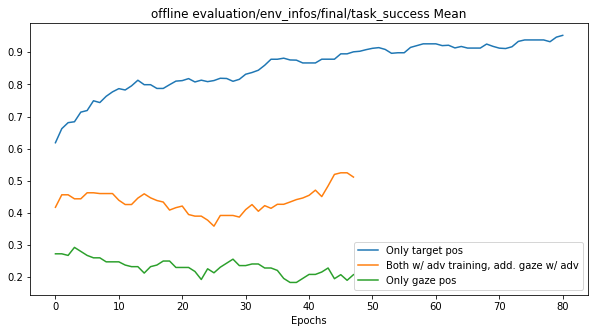

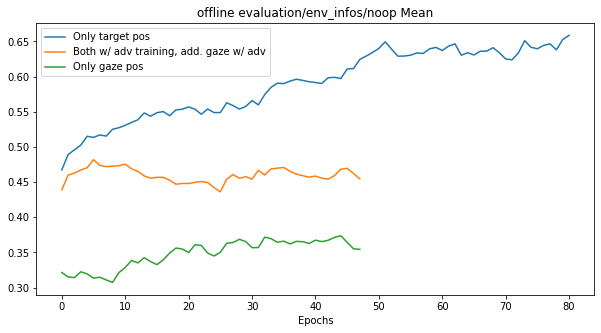

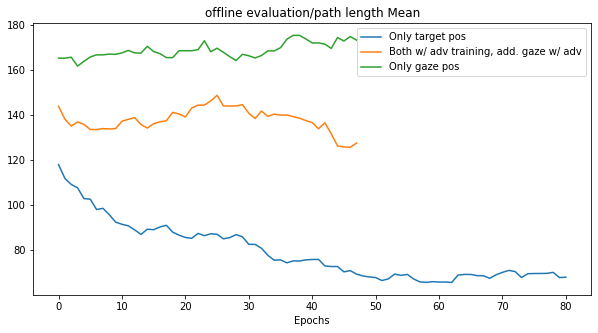

In [415]:

bc_tests = ['bc-new-gaze/']

bc_paths = sum([[(os.path.join(path,run),test) for run in os.listdir(path)] 
             for path,test in [(os.path.join(os.path.abspath(''),'logs',test,),test) for test in bc_tests]],[]) 
bc_paths = sorted(bc_paths, key=lambda x: x[0])

bc_dfs = Reader().read(bc_paths)
for df in bc_dfs:
    df.columns = df.columns.get_level_values(0)
    
dfs = bc_dfs

# bc-gaze/
# i0 = [0], '100 rl'
# i1 = [1], '100 rl tweaked env 1.0'
# i2 = [2], '100 rl tweaked env 2.0'
# i3 = [3], '100 rl tweaked env 3.0'
# i4 = [4], '100 rl deterministic, relative'
# i5 = [5], 'i4 only relative'
# i6 = [7], 'i5 + tool orient'
# i7 = [8], 'i4, switch pos, tool pos, tool orient'
# i8 = [9], 'i7 + arm pos'
# i9 = [10], 'i7 shorter'
# i0 = [11], '100 rl per eps gaze'

# bc
# i0 = [0], '50'
# i1 = [1], '100'
# i2 = [2], 'eval on separate gaze'
# i3 = [3], 'eval on same gaze'
# i4 = [4], '500 same gaze'
# i5 = [7], '100 gt'
# i6 = [8], '1000 gt'
# i7 = [9], 'real 100'
# i8 = [10], 'real 50'
# i9 = [11], 'real 20'
# i10 = [12], 'real 20 + 100 BC int'
# i11 = [13], '20 gt'
# i12 = [14], 'noisy 1000 int gt'
# i13 = [15, 16], 'i12 longer'
# i14 = [17], 'noisier'
# i15 = [18], 'real 100'
# i16 = [19], '1000 bc created'

# i0 = [0], 'Only gaze demos'
# i1 = [1], 'Only target pos demos'
# i2 = [2], 'Both'
# i3 = [3], 'mixed w/ adv (untweak)'
# i4 = [4], 'Both, w/ adv training'
# i5 = [5], 'mixed w/ adv tweaked + noise'
# i6 = [6], 'i5 more noise'
# i7 = [7], 'i4 + ensemble'
# i8 = [8], 'i4 1/3 ens'
# i9 = [9], 'i8 shallower'
# i10 = [10], 'i4 1/5 ens'
# i11 = [11], 'i4 lin encoder'
# i12 = [12], 'Both, w/ adv training, ensembling' # 'i10 smaller encoder'
# i13 = [13], 'i12 shallow decoder'
# i14 = [14], 'i13 0.001 l2'
# i15 = [15], 'i13 0.01 l2'
# i16 = [16], 'i15 no ens'
# i17 = [17], 'i15 64 enc/dec'


# i18 = [18], 'i13 + 1 reconstruct'
# i19 = [19], 'i18 64 enc/dec'
# i20 = [20], 'Both w/ adv training, add. gaze'#'i19 no ens'
# i21 = [21], 'i20 w/ pseudo kl'
# i22 = [22], 'i20 small var'
# i25 = [25], 'i20 all gaze' # 'i20 additional gaze'
# i26 = [26], 'i20 reconstruct only rl'

# i27 = [27], 'i10 additional gaze'
# i28 = [28], 'i20 fixed'
# i29 = [29], 'i22 fixed'
# i30 = [30], 'i4 fixed additional'
# i31 = [31], 'Both w/ adv training, add. gaze w/ adv'#'i24 fixed'
# i32 = [32], 'i31 no reconstruct'
# i33 = [33], 'i25 fixed'
# i34 = [34], 'i26 fixed'

i0 = [0], 'Only target pos'
i1 = [1], 'Both w/ adv training, add. gaze w/ adv'
i2 = [2], 'Only gaze pos'

index_sets = [i0, i1, i2]
window = 20
plot(bc_dfs)

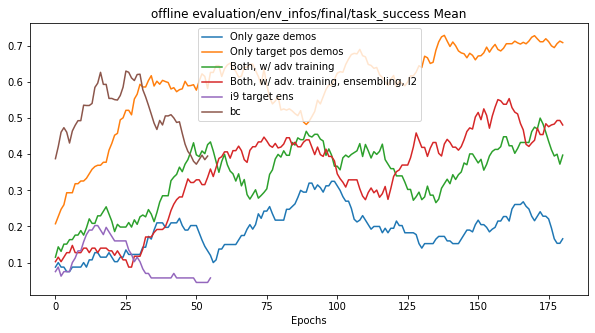

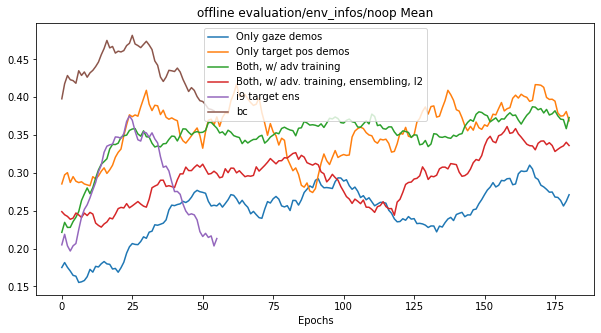

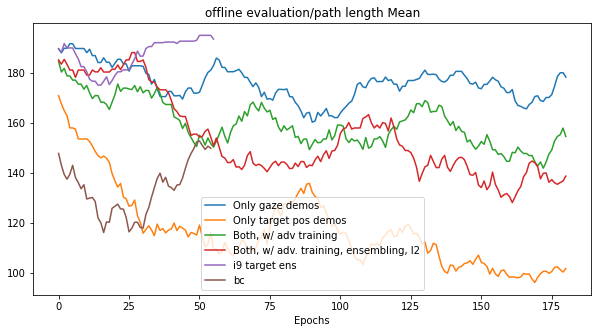

In [397]:
sparse_tests = ['sparse-mixed/']

sparse_paths = sum([[(os.path.join(path,run),test) for run in os.listdir(path)] 
             for path,test in [(os.path.join(os.path.abspath(''),'logs',test,),test) for test in sparse_tests]],[]) 
sparse_paths = sorted(sparse_paths, key=lambda x: x[0])

sparse_dfs = Reader().read(sparse_paths)
for df in sparse_dfs:
    df.columns = df.columns.get_level_values(0)
    
sparse_train = Reader().read(sparse_paths, name='progress.csv')
for df in sparse_train:
    df.columns = df.columns.get_level_values(0)
    
x = len(sparse_dfs)

# i0 = [0], 'weight 2'
# i1 = [1], 'weight 5'
# i2 = [2], 'weight 10'
# i3 = [3], 'offline a=20'
# i4 = [x], 'online weight 2'
# i5 = [x + 1], 'online weight 5'
# i6 = [x + 2], 'online weight 10'
# i7 = [x + 3], 'online weight 20'

# # pretrained with weight 20, larger buffer, lower lr
# i8 = [x + 4], 'demos, eps 0.1, a=0'
# i9 = [x + 5], 'demos, eps 0.1, a=1'
# i10 = [x + 6], 'demos, eps 0.05, a=0'
# i11 = [x + 7], 'no demos, eps 0.1, a=0'
# i12 = [x + 8], 'demos, eps 0.1, a=20'
# i13 = [x + 9], 'demos, eps 0, a=20'
# i14 = [x + 10], 'demos, boltzmann, a=0'
# i15 = [x + 11], 'demos, boltzmann * 10, a=0'
bc = [-6], 'bc'

# i0 = [0], 'offline, a=20, teleop only'
# i1 = [1], 'offline, a=20, w/ data aug'
# i2 = [2], 'offline, a=10, w/ data aug'
# i3 = [3], 'offline, a=20, w/ data aug (cont.)'
# i4 = [4], 'offline, a=20, w/ data aug, tweaked env (bugged)'
# i5 = [5], 'offline, a=20, w/ data aug, tweaked env, adjust (bugged)'
# i6 = [6], 'offline, a=20, w/ data aug (rand), from deterministic'
# i7 = [7], 'i6 no rand'
# i8 = [8], 'i7 500 prior'
# i9 = [9], 'i7 balanced'
# i10 = [10], 'i7 no data aug'
# i11 = [11], 'i9 less prior weight'
# i12 = [12], 'i7 new'
# i13 = [13], 'cql only'
# i14 = [14], 'bc sanity'
# i15 = [15], 'i12 only demos'
# i16 = [18], 'i12 balanced'

# i0 = [19], 'offline, a=20, teleop only, deterministic'
# i1 = [20], 'offline, a=20, w/ data aug, deterministic'
# i2 = [21], 'offline, a=20, w/ data aug, balanced, deterministic'
# i3 = [22], 'offline, a=20, w/ data aug, balanced, cql only teleop, deterministic'
# i4 = [23], 'i1 per step demos'
# i5 = [24], 'i1 + i4'
# i6 = [25], 'i4 synth'
# i7 = [26], 'i1, 5k'

# i7 = [x], 'i3 online weight 0'
# i8 = [x + 1], 'i3 online weight 1'
# i9 = [x + 2], 'i3 online weight 1 eps 0'
# i10 = [x + 3], 'i3 online weight 20 eps 0'

i0 = [0], 'Only gaze demos'
i1 = [1], 'Only target pos demos'
i2 = [2], 'Both, w/ adv training'
i3 = [3], 'mixed w/ discrim'
i4 = [4], 'mixed w/ ens 1/5 discrim shallower enc/dec'
i5 = [5], 'i4 10 aux weight'
i6 = [6], 'i4 1/3 ens discrim'
i7 = [7], 'i4 1/5 ens discrim'
i8 = [8], 'i4 lower discrim lr'
i9 = [9], 'Both, w/ adv. training, ensembling, l2'#'i4 l2 0.01'


index_sets = [i0, i1, i2, i9, i11, bc]
window = 20
plot(sparse_dfs + sparse_train + bc_dfs)
    

In [395]:
i0 = [0], 'gaze classifier'
i1 = [1], 'ground truth'
i2 = [2], 'clipped target'
i3 = [3, 4], 'alpha = 1'
i4 = [5, 17, 18], 'target'
i5 = [6, 12, 13], 'vae sample'
i6 = [7], 'fixed eps vae'
i7 = [9, 10, 11], '2d vae mean'
i8 = [14, 15, 16], '1D vae mean'
i9 = [19, 20, 21], '2d vq-vae'
i10 = [22, 23, 24], '1d vq-vae bad'
i11 = [25, 26, 27], '1D vq-vae'
i12 = [28, 29, 30], '1d vq-vae index'
i13 = [31, 32, 33], 'BC encoder'
i14 = [34, 35, 36], 'BC vae mean'
i15 = [37], '100 teleop + 100 int + 500 no int'
i16 = [38], '100 teleop + 100 int + 500 no int (same gaze)'
i17 = [39], '500 teleop + 500 int (same gaze)'
i18 = [40], '500 teleop + 500 int'


index_sets = [i14, i15, i16, i17, i18]


window = 20


plot(dfs)

IndexError: list index out of range

<Figure size 720x360 with 0 Axes>

139.17666666666668


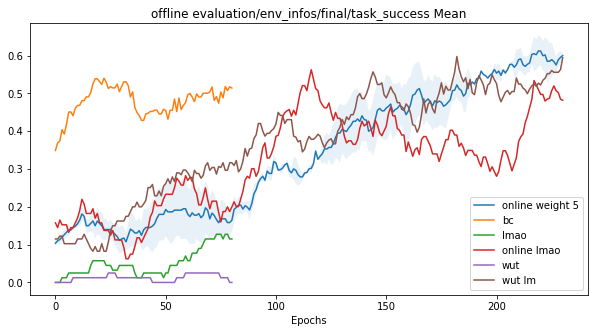

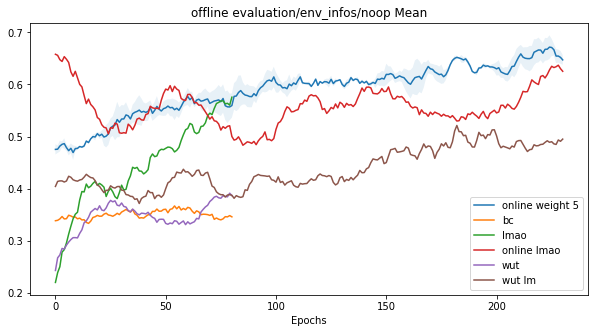

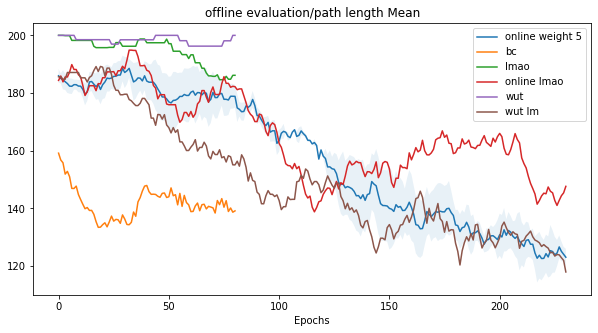

In [161]:
cql_tests = ['cql/']

cql_paths = sum([[(os.path.join(path,run),test) for run in os.listdir(path)] 
             for path,test in [(os.path.join(os.path.abspath(''),'logs',test,),test) for test in cql_tests]],[]) 
cql_paths = sorted(cql_paths, key=lambda x: x[0])

cql_dfs = Reader().read(cql_paths)
for df in cql_dfs:
    df.columns = df.columns.get_level_values(0)
    
train_dfs = Reader().read(cql_paths, name='progress.csv')
for df in train_dfs:
    df.columns = df.columns.get_level_values(0)
    

# i0 = [0], '100 teleop + 1000 BC int'
# i1 = [1], 'int start rews 100 teleop + 1000 BC int'
# i2 = [2], 'int start rews 100 teleop + 100 BC int + 1000 BC no int'
# i3 = [3], 'int start rews 100 teleop + 100 BC int'
# i4 = [4], 'int start rews 100 teleop + 100 BC int + 100 BC no int'
# i5 = [5], 'int start rews 100 teleop + 100 BC int weight 10'
# i6 = [6], '-1 start 100 teleop + 100 BC int + 1000 BC no int'
# i7 = [7], '-1 start 100 teleop + 1000 BC int'
# i8 = [8], '-1 start 100 teleop + 100 BC int, normal 1000 BC no int'
# i9 = [9], 'int start rews 100 teleop + 100 BC, normal 1000 BC no int'
# i10 = [10], '-1 start 100 teleop + 100 BC int'
# i11 = [11], '-1 start 100 teleop + 100 BC int weight 10'
# i12 = [12, 16], 'i11 but done int'
# i13 = [13], 'i12 but throw out interventions'
# i14 = [14], 'i12 but with 500 BC no int'
# i15 = [15], 'i12 but with early term 1000 BC no int'
# i16 = [17], 'i11 real'

# i17 = [18, 26], 'i11 real done int'
# i18 = [19, 27], 'i11 real'
# i19 = [20], 'i11 real done int goal rew BAD'
# i20 = [21], 'i11 real goal rew BAD'
# i21 = [22, 28, 29], 'i11 real done int weight 20'
# i22 = [23], 'i11 real weight 20'
# i23 = [24], 'i11 real done int goal rew weight 20 BAD'
# i24 = [25], 'i11 real goal rew weight 20 BAD'
# i25 = [30], 'i11 real done goal rew weight 20'
# i26 = [31], 'i11 real done goal rew weight 20 20 teleop'
# i27 = [32, 35], 'cql loss weight 20'
# i28 = [33, 36], 'i26 weight 10'
# i29 = [34, 37], 'i26 weight 4'
# i30 = [38], 'only cql loss'
# i31 = [39], '-1 start, 1000 noisy BC int demos, +1 goal rew, weight 1'
# i32 = [40], 'i31, weight 4'

i0 = [0, 8], 'weight 10, goal rew'
i1 = [1, 9], 'weight 10'
i2 = [2, 10], 'offline RL'
i3 = [3, 11], 'weight 10, int dones'
i4 = [4, 12], 'weight 20, goal rew'
i5 = [5, 13], 'weight 20'
i6 = [6, 14], 'weight 20, int dones, goal rew'
i7 = [7, 15], 'weight 20, int dones'
i8 = [16, 17], 'cql loss only'
i9 = [18, 20], 'weight 10'
i10 = [19, 21], 'weight 5'
i11 = [22, 24], 'offline weight 10'
i12 = [23, 25], 'offline weight 5'
i13 = [26], 'lmao'
i17 = [27], 'wut'
i14 = [len(cql_dfs) + 4, len(cql_dfs) + 6], 'online weight 10'
i15 = [len(cql_dfs) + 5, len(cql_dfs) + 7], 'online weight 5'
i16 = [len(cql_dfs) + 8], 'online lmao'
i18 = [len(cql_dfs) + 9], 'wut lm'



b0 = [len(cql_dfs) + len(train_dfs)], 'bc'

print(np.mean(bc_dfs[-1]['evaluation/path length Mean'][-20:]))

# index_sets = [i7, i11, i12, i16, b0]
index_sets = [i15, b0, i13, i16, i17, i18]
window = 20
plot(cql_dfs + train_dfs + bc_dfs[-1:] )

In [165]:
# i0 = [0, 1, 2]
# i1 = [3, 4, 5]
# i2 = [6, 7, 8]
# i3 = [9, 10, 11]
# i4 = [12, 13, 14]
# i5 = [15, 16]
i0 = [0, 5, 6], 'single gaze'
i1 = [1, 10, 11], 'target'
i2 = [2, 3, 4], 'gaze classifier'
i3 = [7, 8, 9], 'single gaze classifier'
i4 = [12, 13, 14], 'single 2d fixed broken'
i5 = [15, 16, 17], 'soft classifier'
i6 = [18, 19, 20], 'pretrained gaze'
i7 = [21], 'freeze 2d'
i8 = [22], 'freeze gaze'
i9 = [23, 24, 25], 'noisy target'
i10 = [26], 'more demos'
i11 = [27, 29, 33], 'per episode noise'
i12 = [28], 'fixed noise longer demos'
i13 = [30, 31, 32], 'per step noise'
il4 = [36, 37, 38], 'qr per episode noise'
il5 = [35, 39, 40], 'qr target'


index_sets = [i1, i11, il4, il5]
# l0 = 'target'
# l1 = 'gaze'
# l2 = 'gaze (1-layer net)'
# l3 = 'gaze (linear iTracker init)'
# l4 = 'gaze (linear iTracker fixed)'
# l5 = 'gaze (single feature)'

In [73]:
import h5py
import torch

data = h5py.File('rl/gaze_capture/gaze_data.h5', 'r')
state = torch.load('rl/gaze_capture/checkpoint.pth.tar')['state_dict']
weights = state['fc.2.weight'].cpu().detach().numpy().T
bias = state['fc.2.bias'].cpu().detach().numpy().T
features = []
for key in data.keys():
    features.append(data[key][()][0])
    # pos = data[key][()] @ weights + bias
    # plt.scatter(pos[:, 0], pos[:, 1], label=key)
#plt.legend()
for i, f1 in enumerate(features):
    for f2 in features[i + 1:]:
        print(np.linalg.norm(f1 - f2))

1.1328684
1.6379217
1.3652909


loaded demos/int_OneSwitch_sim_gaze_on_policy_100_all_debug_1615418204600284881.npy
loaded demos/int_OneSwitch_sim_goal_model_on_policy_1000_all_debug_1615835470059229510.npy


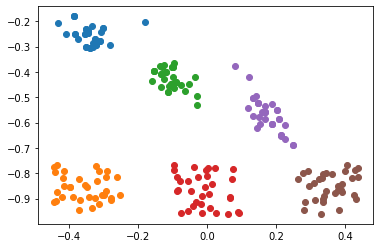

In [127]:
from rlkit.util.io import load_local_or_remote_file
from mpl_toolkits.mplot3d import Axes3D

rl_gaze = h5py.File('rl/gaze_capture/gaze_data_rl.h5', 'r')

gaze_demo_path = 'demos/int_OneSwitch_sim_gaze_on_policy_100_all_debug_1615418204600284881.npy'
gaze_demos = load_local_or_remote_file(gaze_demo_path)
gaze = [[], [], []]
for path in gaze_demos:
    target = np.where(path['env_infos'][1]['target_string'] == 0)[0][0]
    gaze[target].append(path['observations'][1][-128:])
    
pos_path = 'demos/int_OneSwitch_sim_goal_model_on_policy_1000_all_debug_1615835470059229510.npy'
pos_demos = load_local_or_remote_file(pos_path)
pos = [[], [], []]
for path in pos_demos[:100]:
    target = np.where(path['env_infos'][1]['target_string'] == 0)[0][0]
    pos[target].append(path['observations'][1][-128:-125])
pos = [np.array(x) for x in pos]
    
discrim_policy_path = 'logs/bc-mixed/bc_mixed_2021_03_15_12_27_01_0000--s-0/pretrain.pkl'
#discrim_policy_path = 'logs/bc-mixed/bc_mixed_2021_03_15_14_39_16_0000--s-0/pretrain.pkl'
discrim_policy_path = 'logs/bc-mixed/bc_mixed_2021_03_15_14_54_25_0000--s-0/pretrain.pkl'
discrim_policy_path = 'logs/bc-mixed/bc_mixed_2021_03_16_21_52_57_0000--s-0/pretrain.pkl'
discrim_policy_path = 'logs/sparse-mixed/sparse_mixed_2021_03_15_21_16_50_0000--s-0/pretrain.pkl'
#discrim_policy_path = 'logs/sparse-mixed/sparse_mixed_2021_03_17_14_09_47_0000--s-0/pretrain.pkl'


policy = torch.load(discrim_policy_path, map_location=torch.device("cpu"))


fig = plt.figure()
#ax = Axes3D(fig)

# for key in rl_gaze.keys():
for i in range(3):
    rl = rl_gaze[str(i)][()]
    rl_pred = 0
    gaze_pred = 0

#     encoders = policy['qf'].gaze_encoders
#     for encoder in encoders:
#         rl_pred += encoder(torch.Tensor(rl)).detach().numpy()
#         gaze_pred += encoder(torch.Tensor(gaze[i])).detach().numpy()
        
    encoder = policy['qf'].gaze_encoder
    
    
#     for encoder in policy.gaze_encoders:
#         rl_pred += encoder(torch.Tensor(rl)).detach().numpy()
#         gaze_pred += encoder(torch.Tensor(gaze[i])).detach().numpy()
        
#    rl_pred /= policy['qf'].num_encoders
#    gaze_pred /= policy['qf'].num_encoders
    rl_pred = encoder(torch.Tensor(rl)).detach().numpy()
    gaze_pred = encoder(torch.Tensor(gaze[i])).detach().numpy()
    #ax.scatter(rl_pred[..., 0], rl_pred[..., 1], rl_pred[..., 2])
    #ax.scatter(gaze_pred[..., 0], gaze_pred[..., 1], gaze_pred[..., 2])
    #ax.scatter(pos[i][:, 0], pos[i][:, 1], pos[i][:, 2])
    #plt.scatter(rl_pred[..., 0], rl_pred[..., 1])
    plt.scatter(gaze_pred[..., 0], gaze_pred[..., 1])
    plt.scatter(pos[i][:, 0], pos[i][:, 1])



In [ ]:
alphas = dict(zip(result_names,[.01]*len(result_names)))
font = {'family' : 'normal',
        'weight': 'normal',
        'size'   : 12}
matplotlib.rc('font', **font)
fig, axs = plt.subplots(nrows=(len(result_names)+1)//2,ncols=2,figsize=(15,5))
axs = axs.flatten()
idx = pd.IndexSlice
test_name_map = {'experiment2-laptop-dqn':'dqn','experiment2-laptop-sac':'sac',
                 'experiment2-laptop-dqn-cql':'cql-dqn','experiment2-laptop-cql':'cql-sac',}
metric_name_map = {'expl_successes':'Success Rate','expl_noop': 'User Noop Rate'}

# slice_df = slice_df.drop(columns=[(5e-4,1e-2),(1e-3,1e-2)])
# print(slice_df.head())


for (name,alpha),ax in zip(alphas.items(),axs):
#     try:
        mean_graph = df_mean.loc[:,idx[:,:,:,:,name]]
        std_graph = df_std.loc[:,idx[:,:,name]]
#         graph_df = df.loc[:,[(.001,.1,.1,name),(.001,1,.3,name)]]

#         graph_df = graph_df.drop(columns=[(1e-3,5e-5,1e-2)])
        mean_graph.columns = mean_graph.columns.droplevel([c for c in mean_graph.columns.names
                                                           if mean_graph.columns.get_level_values(c).unique().size == 1])
        mean_graph = mean_graph.ewm(alpha=alpha).mean()
        std_graph.columns = std_graph.columns.droplevel([c for c in std_graph.columns.names
                                                         if std_graph.columns.get_level_values(c).unique().size == 1])
        std_graph = std_graph.ewm(alpha=alpha).mean()
        for (col_names,mean),(_col_names,std) in zip(mean_graph.iteritems(),std_graph.iteritems()):
            ax.fill_between(x=range(mean.size),y1=np.maximum(0,mean-std),y2=np.minimum(1,mean+std),alpha=.3)
            ax.plot(range(mean.size),mean,label=f"({not col_names[0]},{test_name_map[col_names[1]]})")
        ax.set_title(metric_name_map[name])
        ax.set_xlabel("Epochs")
#         ax.legend(loc=3,fontsize='xx-small',title_fontsize='xx-small',title="user input penalty,algorithm")
        ax.legend(loc=3,fontsize='xx-small',title_fontsize='xx-small',title="user input penalty,algorithm")
#     except:
#         continue

# plt.savefig('experiment2_laptop_full.png')

In [47]:
defaults = { demo[-17:-4]:np.load(os.path.join(os.path.abspath(''),'demos',demo),allow_pickle=True)
             for demo in os.listdir(os.path.join(os.path.abspath(''),"demos")) if f"thr_" in demo and "OneSwitch" in demo}
# defaults = [np.load(os.path.join(os.path.abspath(''),'demos',f"LightSwitch_usermodel_1001.npy"),allow_pickle=True)]

In [48]:
defaults.keys()

dict_keys(['thr_.5_eps_50', 'thr_.5_eps_25', '_thr_.5_eps_0', '_thr_.0_eps_0', '_thr_.2_eps_0'])

In [49]:
success = {key:np.mean([path['env_infos'][-1]['task_success'] for path in paths])
           for key,paths in defaults.items()}
bad_contact = {key:np.mean([path['env_infos'][-1]['bad_contact'] for path in paths])
           for key,paths in defaults.items()}
noop = {key:np.mean(sum([[info['noop'] for info in path['env_infos']] for path in paths],[]))
           for key,paths in defaults.items()}
cos = {key:np.mean(sum([[info['cos_error'] for info in path['env_infos']] for path in paths],[]))
           for key,paths in defaults.items()}

In [50]:
success

{'thr_.5_eps_50': 1.0,
 'thr_.5_eps_25': 1.0,
 '_thr_.5_eps_0': 1.0,
 '_thr_.0_eps_0': 1.0,
 '_thr_.2_eps_0': 0.99375}

In [51]:
noop

{'thr_.5_eps_50': 0.5710240436595788,
 'thr_.5_eps_25': 0.6327110825018775,
 '_thr_.5_eps_0': 0.6814617849594328,
 '_thr_.0_eps_0': 0.7638537347191556,
 '_thr_.2_eps_0': 0.7429401323220913}

In [22]:
params_2_test = defaultdict(list)

for path in paths:
    test_name = os.path.split(os.path.split(path)[0])[1]     

    params = []
    with open(os.path.join(path,'variant.json'),) as f:
        all_params = json.load(f) 
    for name,full_name in zip(param_names,param_full_names):
        param = all_params
        for key in full_name.split('/'):
            param = param.get(key,0)
        params.append(param)
    params = tuple(params)
    params_2_test[params].append(test_name)
    

TypeError: expected str, bytes or os.PathLike object, not tuple

In [32]:
params_2_test

defaultdict(list,
            {(1000,): ['run1', 'run0', 'run4'],
             (1,): ['run5', 'run2', 'run3']})

In [67]:
trajs = [np.load(os.path.join(os.path.abspath(''),'eval_paths1',f"{run[3:]}_eval_paths.npy"),allow_pickle=True)
             for run in ['run14']]

In [68]:
print(len(trajs[0]))

18


In [85]:
pos = sum([[tr['observations'][:,-20:-17] for tr in traj[:40]] for traj in trajs],[])
pos1 = pos[0]
mean_pos = np.mean(pos1,axis=0)
max_extent = np.max(np.linalg.norm(pos1-mean_pos,axis=1))
pos1 = (pos1-mean_pos)/max_extent

pos2 = pos[1]
mean_pos = np.mean(pos2,axis=0)
max_extent = np.max(np.linalg.norm(pos2-mean_pos,axis=1))
pos2 = (pos2-mean_pos)/max_extent

# pos = np.mean(pos,axis=0)
reg_pos = []
for traj in pos:
    mean_pos = np.mean(traj,axis=0)
    max_extent = np.max(np.linalg.norm(traj-mean_pos,axis=1))
    traj = (traj-mean_pos)/max_extent
    reg_pos.append(traj)
pos = np.array([np.mean([sample[i] for sample in reg_pos if len(sample) > i],axis=0) for i in range(200)])


NameError: name 'trajs' is not defined

In [70]:
# a = .15
# b = .3
# c = .6

In [71]:
dpos = [tr['observations'][:,-20:-17] for tr in defaults[0]]
dpos1 = dpos[0]
mean_pos = np.mean(dpos1,axis=0)
max_extent = np.max(np.linalg.norm(dpos1-mean_pos,axis=1))
dpos1 = (dpos1-mean_pos)/max_extent

dreg_pos = []
for traj in dpos:
    mean_pos = np.mean(traj,axis=0)
    max_extent = np.max(np.linalg.norm(traj-mean_pos,axis=1))
    traj = (traj-mean_pos)/max_extent
    dreg_pos.append(traj)
dpos = np.array([np.mean([sample[i] for sample in dreg_pos if len(sample) > i],axis=0) for i in range(200)])


In [72]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

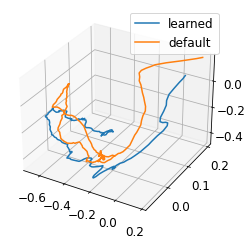

In [73]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(*list(zip(*pos)),label='learned')
ax.plot(*list(zip(*dpos)),label='default')
ax.legend()

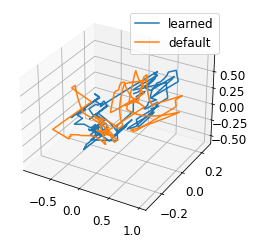

In [74]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(*list(zip(*pos1)),label='learned')
ax.plot(*list(zip(*dpos1)),label='default')
ax.legend()

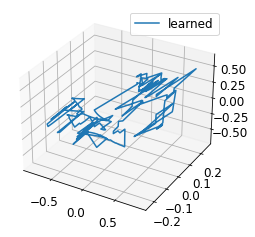

In [75]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(*list(zip(*pos2)),label='learned')
# ax.plot(*list(zip(*dpos2)),label='default')
ax.legend()